In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
plt.style.use('seaborn')
plt.rc('axes', titlesize=10)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
lstx = (7,10.3,13.7,16.6,19.8,22)
lsty= (479,503,487,470,458,412)
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx, lsty)),
               columns =["x","y"])
x=df['x']
y=df['y']

In [4]:
#Proceso de regressão 
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     6.950
Date:                Sun, 10 Apr 2022   Prob (F-statistic):             0.0578
Time:                        19:09:41   Log-Likelihood:                -25.637
No. Observations:                   6   AIC:                             55.27
Df Residuals:                       4   BIC:                             54.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        533.6984     26.328     20.271      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


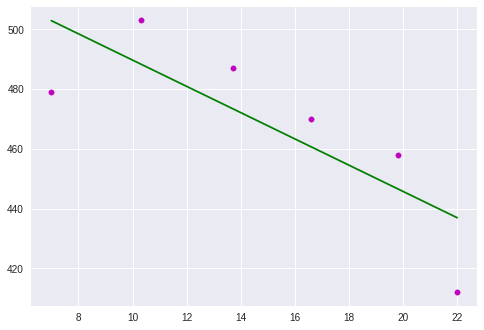

In [5]:
x=df['x']
y=df['y']
yp= 533.6984 -4.3981*x
plt.plot(x, yp, color = "g")
plt.scatter(x, y, color = "m",  marker = "o", s = 30)
plt.grid(True)
x = sm.add_constant(x)

No handles with labels found to put in legend.


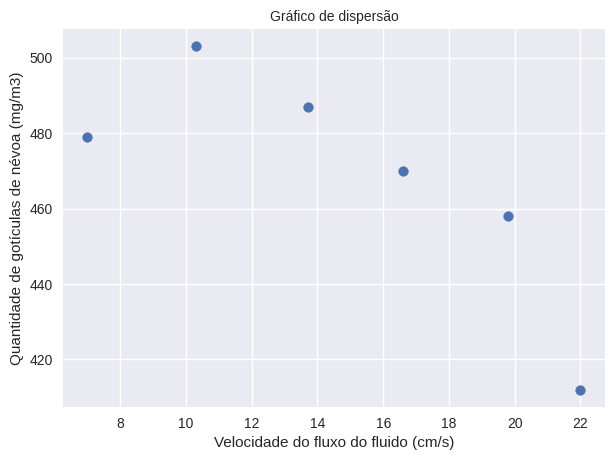

In [6]:
x=df['x']
y=df['y']
#@title Resposta a)
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.scatter(x,y)
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m3)') 
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()

Visto que os dados estão muito afastados da reta e que apresentam uma semelhança com um polinómio quadrático, é necessário criar as características do polinomio antes de realizar o ajuste.

In [7]:
x=df['x']
y=df['y']
x = sm.add_constant(x) 
#Manter x + constant
from sklearn.preprocessing import PolynomialFeatures
#definir o valor de k, isto é o grau do polinômio
polynomial_features= PolynomialFeatures(degree=2)
xp = polynomial_features.fit_transform(x)
xp.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


(6, 6)

In [8]:
xp

array([[  1.  ,   1.  ,   7.  ,   1.  ,   7.  ,  49.  ],
       [  1.  ,   1.  ,  10.3 ,   1.  ,  10.3 , 106.09],
       [  1.  ,   1.  ,  13.7 ,   1.  ,  13.7 , 187.69],
       [  1.  ,   1.  ,  16.6 ,   1.  ,  16.6 , 275.56],
       [  1.  ,   1.  ,  19.8 ,   1.  ,  19.8 , 392.04],
       [  1.  ,   1.  ,  22.  ,   1.  ,  22.  , 484.  ]])

In [9]:
xp[:,3:6]

array([[  1.  ,   7.  ,  49.  ],
       [  1.  ,  10.3 , 106.09],
       [  1.  ,  13.7 , 187.69],
       [  1.  ,  16.6 , 275.56],
       [  1.  ,  19.8 , 392.04],
       [  1.  ,  22.  , 484.  ]])

In [10]:
#Aplicar a regressão polinomial com o novo x, isto é xp
modelpo = sm.OLS(y,xp[:,3:6]).fit()
ypred = modelpo.predict(xp[:,3:6]) 
ypred.shape

(6,)

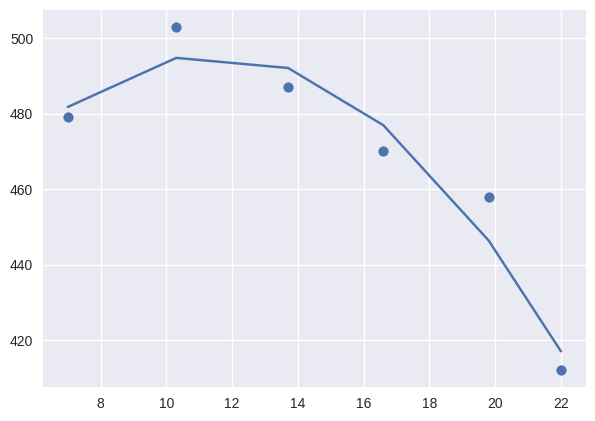

In [11]:
x=df['x']
plt.scatter(x,y)
plt.plot(x,ypred)

In [12]:
modelpo = sm.OLS(y, xp[:,3:6]).fit()
print(modelpo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     22.51
Date:                Sun, 10 Apr 2022   Prob (F-statistic):             0.0156
Time:                        19:09:41   Log-Likelihood:                -20.339
No. Observations:                   6   AIC:                             46.68
Df Residuals:                       3   BIC:                             46.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        403.2396     36.453     11.062      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n), ValueWarning)


In [13]:
#@title resposta b)
#calcular SQE--> Baseado nos valores esperados
sqe = np.sum((ypred - y)**2)
print("SQE=", sqe)

#calcular SQT-->Baseado nos valores observados
sqt = np.sum((y - y.mean())**2)
print("SQT=", sqt)

#calcular SQR
sqr = sqt - sqe
print("SQR=",sqr)

R2=1-sqe/sqt
print("Coeficiente de determinação múltippla=",R2, "ou",R2*100, "%")

k=modelpo.df_model # grau do modelo
n=modelpo.nobs # num. amostras
R2adj=((n-1)*R2-k)/(n-1-k)

print("R2 ajustado=",R2adj, "ou",R2adj*100, "%")

SQE= 309.1089896029992
SQT= 4946.833333333333
SQR= 4637.724343730334
Coeficiente de determinação múltippla= 0.9375137651151243 ou 93.75137651151243 %
R2 ajustado= 0.8958562751918739 ou 89.5856275191874 %


In [14]:
r2d=modelpo.rsquared
r2adjd=modelpo.rsquared_adj
print('R2= {0}, R2 ajustado= {1}'.format(r2d,r2adjd))  

R2= 0.9375137651151243, R2 ajustado= 0.8958562751918738


In [25]:
df1 = pd.DataFrame(list(zip(xp[:,3],xp[:,4],xp[:,5],y)),
               columns =["x1","x2","x3","y"])
df1.head(10)

,x1,x2,x3,y
0,1.0,7.0,49.00,479
1,1.0,10.3,106.09,503
2,1.0,13.7,187.69,487
3,1.0,16.6,275.56,470
4,1.0,19.8,392.04,458
5,1.0,22.0,484.00,412


In [26]:
pred=modelpo.get_prediction(df1.iloc[:,0:3])
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,481.776822,9.354919,452.005294,511.548349,437.846284,525.707359
1,494.794694,5.780930,476.397196,513.192192,457.619215,531.970173
2,492.117734,6.486305,471.475416,512.760053,453.781673,530.453796
3,476.930505,6.095090,457.533208,496.327802,439.250226,514.610784
4,446.385379,5.693617,428.265749,464.505010,409.346625,483.424133
5,416.994866,8.748473,389.153321,444.836411,374.348648,459.641084


# Resposta c)

IC de $\mu_{Y,13,7}$ pode se calcular com $\hat{Y} \pm t_{\frac{\alpha}{2},(n-(k+1))} s_{\hat{Y}} $

$s^2=\frac{SQE}{n-(k+1)}$



In [27]:
x=df['x']
xs=13.7
xm=x.mean()
uy13=492.1155
xs,xm,uy13

(13.7, 14.9, 492.1155)

In [28]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.05  # significia = 5% 
df = n-(k+1) # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 3.182446305284263


In [29]:
#@title Resposta d)
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.01  # significia = 1% 
df = n-(k+1) # graus de liberdade                                      
v = t.ppf(1 - alpha/2, df) 
tt=v
print(f't_crit=: {v}')

t_crit=: 5.84090929975643


In [30]:
s2=sqe/(n-(k+1))
s=pow(s2,1/2)
s

10.15068125140704

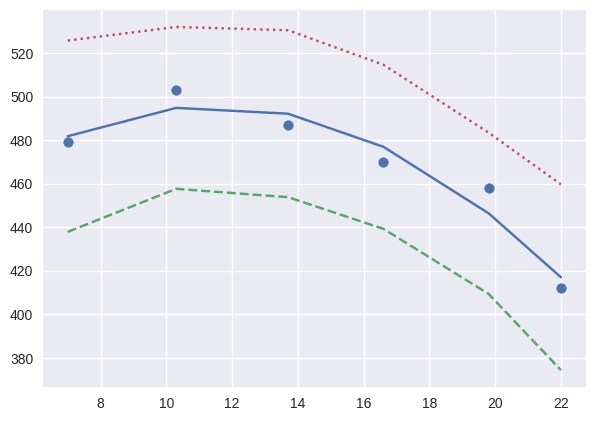

In [31]:
#Intervalos 
from scipy import stats
from statsmodels.sandbox.regression.predstd import wls_prediction_std
_, upper,lower = wls_prediction_std(modelpo)
plt.scatter(x,y)
plt.plot(x,ypred)
plt.plot(x,upper,'--',label="Maior") # confid. intrvl
plt.plot(x,lower,':',label="Menor")